In [1]:
#  Required Install
!pip install librosa

In [2]:
#Import Dependencies
from pylab import *
import os
import pandas as pd
import librosa
import librosa.display
import glob
import random

# Sample one audio File

[0. 0. 0. ... 0. 0. 0.] 22050


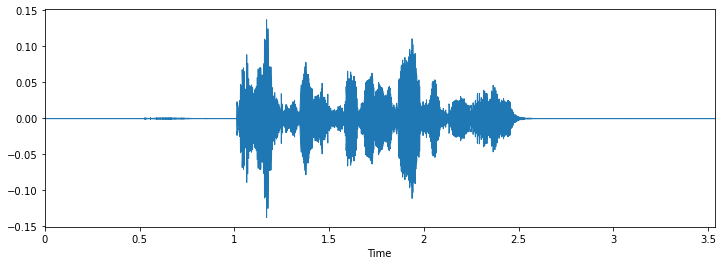

In [3]:
data, sampling_rate = librosa.load('../data/emotion_speech/03-01-08-01-02-02-02.wav')
plt.figure(figsize=(12, 4))

print(data, sampling_rate)
librosa.display.waveplot(data, sr=sampling_rate)

# RAVDASS AUDIO SET


# Generate list of file and apply emotion str

In [4]:
##Get list of Files in folder
file_name = []

for root, dirs, files in os.walk("../data/emotion_speech/."):
    for filename in files:
        file_name.append(filename)

file_name_df = pd.DataFrame(file_name, columns = ['file_name'])
file_name_df['encoding']= file_name_df['file_name']
file_name_df['ID'] = file_name_df.index 
file_name_df['dir']= 'emotion_speech'
file_name_df

,file_name,encoding,ID,dir
0,03-01-06-01-02-02-02.wav,03-01-06-01-02-02-02.wav,0,emotion_speech
1,03-01-05-01-02-01-16.wav,03-01-05-01-02-01-16.wav,1,emotion_speech
2,03-01-08-01-01-01-14.wav,03-01-08-01-01-01-14.wav,2,emotion_speech
3,03-01-06-01-02-02-16.wav,03-01-06-01-02-02-16.wav,3,emotion_speech
4,03-01-05-01-02-01-02.wav,03-01-05-01-02-01-02.wav,4,emotion_speech
...,...,...,...,...
1436,03-01-08-02-02-01-19.wav,03-01-08-02-02-01-19.wav,1436,emotion_speech
1437,03-01-02-02-01-01-23.wav,03-01-02-02-01-01-23.wav,1437,emotion_speech
1438,03-01-02-01-02-01-23.wav,03-01-02-01-02-01-23.wav,1438,emotion_speech
1439,03-01-08-01-01-01-19.wav,03-01-08-01-01-01-19.wav,1439,emotion_speech


In [51]:
#Create DF seperating Values
# Filename identifiers

# Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
# Vocal channel (01 = speech, 02 = song).
# Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
# Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
# Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
# Repetition (01 = 1st repetition, 02 = 2nd repetition).
# Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

encoding_df = file_name_df["encoding"].str.split("-", n=-1, expand=True)
encoding_df.columns = ['Modality','Vocal_channel','Class','Intensity','Statement','Repetition','Actor']
final_df = encoding_df.drop(columns=['Modality','Vocal_channel','Intensity','Statement','Repetition','Actor'])

final_df.loc[final_df.Class == '01', 'Class'] = '02'
final_df.loc[final_df.Class == '02', 'Emotion'] = 'calm'
final_df.loc[final_df.Class == '03', 'Emotion'] = 'happy'
final_df.loc[final_df.Class == '04', 'Emotion'] = 'sad'
final_df.loc[final_df.Class == '05', 'Emotion'] = 'angry'
final_df.loc[final_df.Class == '06', 'Emotion'] = 'fearful'
final_df.loc[final_df.Class == '07', 'Emotion'] = 'disgust'
final_df.loc[final_df.Class == '08', 'Emotion'] = 'surprise'

final_df

,Class,Emotion
0,06,fearful
1,05,angry
2,08,surprise
3,06,fearful
4,05,angry
...,...,...
1436,08,surprise
1437,02,calm
1438,02,calm
1439,08,surprise


In [52]:
#merge data frame
pre_merged_df = file_name_df.join(final_df, how='outer')
merged_df = pre_merged_df.drop(columns=['encoding'])
merged_df.set_index('ID')

,file_name,dir,Class,Emotion
ID,,,,
0,03-01-06-01-02-02-02.wav,emotion_speech,06,fearful
1,03-01-05-01-02-01-16.wav,emotion_speech,05,angry
2,03-01-08-01-01-01-14.wav,emotion_speech,08,surprise
3,03-01-06-01-02-02-16.wav,emotion_speech,06,fearful
4,03-01-05-01-02-01-02.wav,emotion_speech,05,angry
...,...,...,...,...
1436,03-01-08-02-02-01-19.wav,emotion_speech,08,surprise
1437,03-01-02-02-01-01-23.wav,emotion_speech,02,calm
1438,03-01-02-01-02-01-23.wav,emotion_speech,02,calm


In [53]:
merged_df.Class.value_counts()

02    288
07    192
05    192
03    192
04    192
06    192
08    192
Name: Class, dtype: int64

# TORONTO EMOTIONAL SPEECH DATASET

In [54]:
##Get list of Files in folder
t_file_name = []

for root, dirs, files in os.walk("../data/toronto_speech/."):
    for filename in files:
        t_file_name.append(filename)

t_file_name_df = pd.DataFrame(t_file_name, columns = ['file_name'])
t_file_name_df['encoding']= t_file_name_df['file_name']
t_file_name_df['ID'] = t_file_name_df.index 
t_file_name_df['dir'] = 'toronto_speech'
t_file_name_df.head(20)

,file_name,encoding,ID,dir
0,YAF_wire_happy.wav,YAF_wire_happy.wav,0,toronto_speech
1,OAF_fat_disgust.wav,OAF_fat_disgust.wav,1,toronto_speech
2,OAF_bought_happy.wav,OAF_bought_happy.wav,2,toronto_speech
3,OAF_fit_neutral.wav,OAF_fit_neutral.wav,3,toronto_speech
4,YAF_dead_fear.wav,YAF_dead_fear.wav,4,toronto_speech
5,OAF_join_neutral.wav,OAF_join_neutral.wav,5,toronto_speech
6,YAF_hall_happy.wav,YAF_hall_happy.wav,6,toronto_speech
7,YAF_hurl_neutral.wav,YAF_hurl_neutral.wav,7,toronto_speech
8,OAF_king_angry.wav,OAF_king_angry.wav,8,toronto_speech
9,OAF_rot_angry.wav,OAF_rot_angry.wav,9,toronto_speech


In [55]:
t_encoding_df = t_file_name_df["encoding"].str.split("_", n=-1, expand=True)
t_encoding_df.columns = ['Actor','Word','Emotion']
t_final_df = t_encoding_df.drop(columns=['Actor','Word'])
t_final_df = t_final_df['Emotion'].str.strip('.wav')
toronto_df = pd.DataFrame(t_final_df)
toronto_df

,Emotion
0,happy
1,disgust
2,happy
3,neutral
4,fear
...,...
2796,sad
2797,fear
2798,neutral
2799,happy


In [63]:
toronto_df.loc[toronto_df.Emotion == 'neutral', 'Class'] = '02'
toronto_df.loc[toronto_df.Emotion == 'alm', 'Class'] = '02'
toronto_df.loc[toronto_df.Emotion == 'happy', 'Class'] = '03'
toronto_df.loc[toronto_df.Emotion == 'sad', 'Class'] = '04'
toronto_df.loc[toronto_df.Emotion == 'ngry', 'Class'] = '05'
toronto_df.loc[toronto_df.Emotion == 'fear', 'Class'] = '06'
toronto_df.loc[toronto_df.Emotion == 'disgust', 'Class'] = '07'
toronto_df.loc[toronto_df.Emotion == 'ps', 'Class'] = '08'

toronto_df.head(15)

,Emotion,Class
0,happy,03
1,disgust,07
2,happy,03
3,neutral,02
4,fear,06
5,neutral,02
6,happy,03
7,neutral,02
8,ngry,05
9,ngry,05


In [64]:
#merge data frame and export CSV
t_pre_merged_df = t_file_name_df.join(toronto_df, how='outer')
t_merged_df = t_pre_merged_df.drop(columns=['encoding'])
t_merged_df = t_merged_df[['file_name', 'dir', 'Class','Emotion','ID']]
t_merged_df
t_merged_df.set_index('ID')

,file_name,dir,Class,Emotion
ID,,,,
0,YAF_wire_happy.wav,toronto_speech,03,happy
1,OAF_fat_disgust.wav,toronto_speech,07,disgust
2,OAF_bought_happy.wav,toronto_speech,03,happy
3,OAF_fit_neutral.wav,toronto_speech,02,neutral
4,YAF_dead_fear.wav,toronto_speech,06,fear
...,...,...,...,...
2796,OAF_rain_sad.wav,toronto_speech,04,sad
2797,OAF_kill_fear.wav,toronto_speech,06,fear
2798,OAF_vine_neutral.wav,toronto_speech,02,neutral


In [65]:
t_merged_df.Class.value_counts()

07    400
05    400
02    400
03    400
04    400
06    400
08    400
Name: Class, dtype: int64

# CONCAT DATASETS & RESET INDEX

In [66]:
dataset_df = pd.concat([merged_df, t_merged_df])
dataset2 = dataset_df.reset_index(drop=True)
dataset2['ID']= dataset2.index
final_dataset_df = dataset2
final_dataset_df

,file_name,ID,dir,Class,Emotion
0,03-01-06-01-02-02-02.wav,0,emotion_speech,06,fearful
1,03-01-05-01-02-01-16.wav,1,emotion_speech,05,angry
2,03-01-08-01-01-01-14.wav,2,emotion_speech,08,surprise
3,03-01-06-01-02-02-16.wav,3,emotion_speech,06,fearful
4,03-01-05-01-02-01-02.wav,4,emotion_speech,05,angry
...,...,...,...,...,...
4237,OAF_rain_sad.wav,4237,toronto_speech,04,sad
4238,OAF_kill_fear.wav,4238,toronto_speech,06,fear
4239,OAF_vine_neutral.wav,4239,toronto_speech,02,neutral
4240,OAF_hate_happy.wav,4240,toronto_speech,03,happy


In [67]:
final_dataset_df.to_csv(r'../data/voice_feature_data.csv', index = True)

In [68]:
train = pd.read_csv('../data/voice_feature_data.csv')
data_dir = ('../data')
train.head()

,Unnamed: 0,file_name,ID,dir,Class,Emotion
0,0,03-01-06-01-02-02-02.wav,0,emotion_speech,6.0,fearful
1,1,03-01-05-01-02-01-16.wav,1,emotion_speech,5.0,angry
2,2,03-01-08-01-01-01-14.wav,2,emotion_speech,8.0,surprise
3,3,03-01-06-01-02-02-16.wav,3,emotion_speech,6.0,fearful
4,4,03-01-05-01-02-01-02.wav,4,emotion_speech,5.0,angry


# CREATE FEATURES

In [69]:
train.Class.value_counts()

2.0    688
7.0    592
4.0    592
3.0    592
8.0    592
5.0    592
6.0    592
Name: Class, dtype: int64

In [70]:
def parser(row):
   # function to load files and extract features
   file_name = os.path.join(os.path.abspath(data_dir), str(row.dir), str(row.file_name))

   # handle exception to check if there isn't a file which is corrupted
   try:
      # extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # extract mfcc data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file_name)
      return None, None
 
   feature = mfccs
   label = row.Class
 
   return [feature, label]

temp = train.apply(parser, axis=1)

/Users/timsamson/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error encountered while parsing file:  /Users/timsamson/Desktop/Bootcamp/audible_emotion_recognition/data/emotion_speech/.DS_Store


/Users/timsamson/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error encountered while parsing file:  /Users/timsamson/Desktop/Bootcamp/audible_emotion_recognition/data/toronto_speech/.DS_Store


In [71]:
#DataFrame of Features and Labels
audio = pd.DataFrame(temp.tolist(), index= temp.index)
audio.columns = ['feature', 'label']
print(audio)

                                                feature  label
0     [-573.37915, 34.06404, -33.337578, 3.4899156, ...    6.0
1     [-545.24457, 38.073475, -8.023163, 7.236882, -...    5.0
2     [-690.53546, 43.141396, -9.854416, 10.81954, -...    8.0
3     [-553.61163, 41.233486, -9.912664, 8.587062, -...    6.0
4     [-576.15344, 49.947994, -13.857949, 8.248825, ...    5.0
...                                                 ...    ...
4237  [-540.3414, 88.73076, 24.931204, 16.717299, 12...    4.0
4238  [-422.4946, 53.755165, -2.5026753, 7.4916716, ...    6.0
4239  [-503.59506, 93.18696, 12.731936, 10.6216, 0.9...    2.0
4240  [-463.14896, 82.21518, 6.5161567, 3.6688368, -...    3.0
4241  [-462.23047, 87.86248, 6.312949, 0.8862172, 6....    7.0

[4242 rows x 2 columns]


In [72]:
#set list as object
new_audio= audio.astype(object)
new_audio

,feature,label
0,"[-573.37915, 34.06404, -33.337578, 3.4899156, ...",6
1,"[-545.24457, 38.073475, -8.023163, 7.236882, -...",5
2,"[-690.53546, 43.141396, -9.854416, 10.81954, -...",8
3,"[-553.61163, 41.233486, -9.912664, 8.587062, -...",6
4,"[-576.15344, 49.947994, -13.857949, 8.248825, ...",5
...,...,...
4237,"[-540.3414, 88.73076, 24.931204, 16.717299, 12...",4
4238,"[-422.4946, 53.755165, -2.5026753, 7.4916716, ...",6
4239,"[-503.59506, 93.18696, 12.731936, 10.6216, 0.9...",2
4240,"[-463.14896, 82.21518, 6.5161567, 3.6688368, -...",3


In [73]:
#Write to CSV
new_audio.to_csv('../data/voice_data.csv')